# Deep Learning using MINST dataset

An introduction to deep learning using the MINST dataset to train the model to identify
handwritten digits.

## First step in deep learning with the MNIST data set

The purpose of this notebook is to take its first step in deep learning by reproducing  the results given on the [MNIST site](http://yann.lecun.com/exdb/mnist/). In less than 3 minutes, you will build and train a fully connected neural network (NN)
performing less than 1.5% error on the [MNIST database](http://yann.lecun.com/exdb/mnist/),
and then, in less than 15 minutes, a convolutional neural network
performing less than 1% error.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png"
alt="MNIST data" width="240" height="180" border="1" />

From https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from time import time

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### I. Load the MNIST data

The leader board:
http://yann.lecun.com/exdb/mnist/

https://nextjournal.com/gkoehler/pytorch-mnist


1. transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor transforms.

2. transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively. The values 0.1307 and 0.3081 used for the Normalize() transformation below are the global mean and standard deviation of the MNIST dataset, we'll take them as a given here.

In [3]:
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

In [5]:
train_set = datasets.MNIST('datasets/', download=True, train=True, transform=transform)
test_set = datasets.MNIST('datasets/', download=True, train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


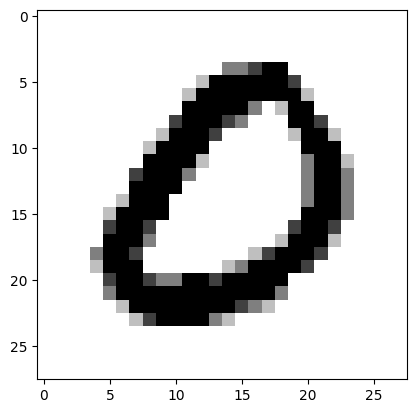

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [8]:
# Raw image array
print(np.round(images[0]- np.min(images[0].numpy())))

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2.,
          3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 3., 3., 3.,
          3., 3., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3., 3., 3., 3., 3.,
          3., 3., 3., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3.,

All images in the dataset are arrays of 28x28 pixels in black and white that represent
digits from 0 to 9. 
If we go through the images and graph them like the one above, you can recognize the
handwritten digits. They're not always very clear, but it is not hard for our brain
to identify what digit it is.

The goal of this exercise is to build a model that is also able to regognize them.

The following images will show some samples of the images we have to get a better
idea of what we're doing.

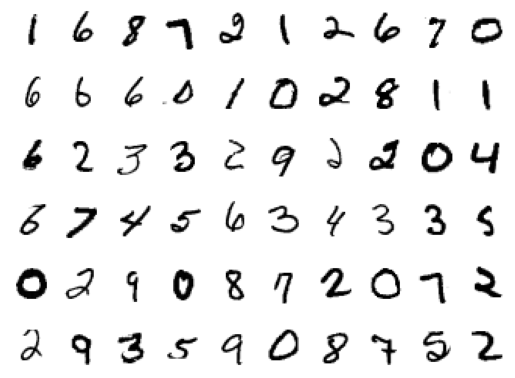

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

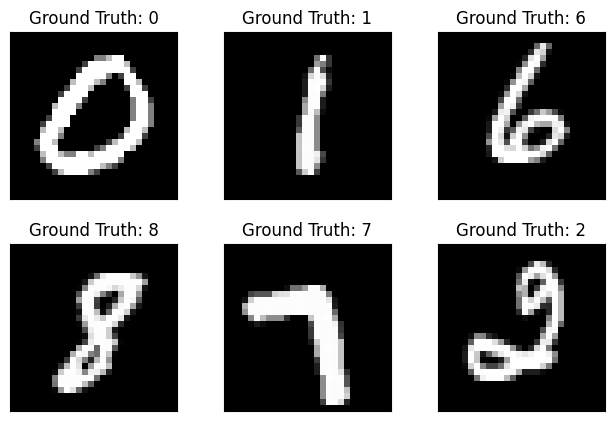

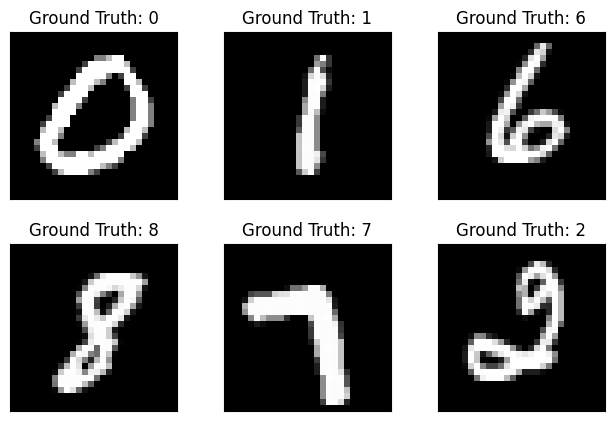

In [10]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

### II. Pytorch

In essence, a neuron is a linear function that has a threshold of activation with a
non-linear function. There are many functions that can be used to model this behaviour,
however, one of the most popular functions is the following because of it's simplicity.

$$ ReLU = \max(0,x) $$


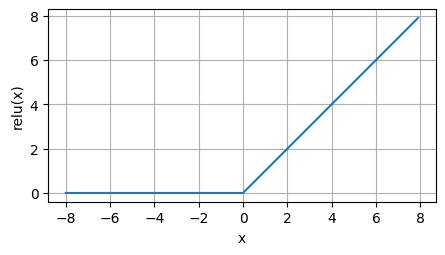

In [11]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), y.detach())
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid()
plt.show()

In [12]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

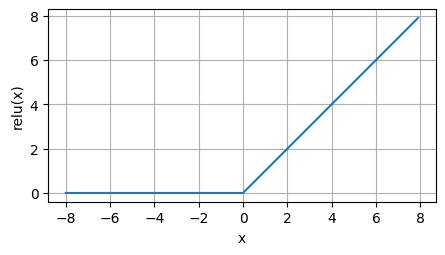

In [13]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
yf = relu(x)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), yf.detach())
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid()
plt.show()

There are other functions that can be used.

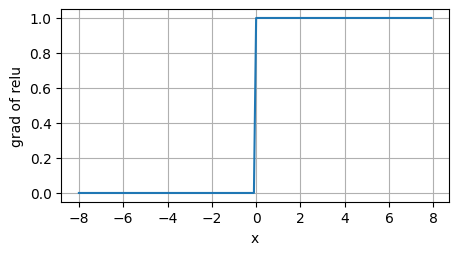

In [14]:
yf.backward(torch.ones_like(x), retain_graph=True)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of relu')
plt.grid()
plt.show()

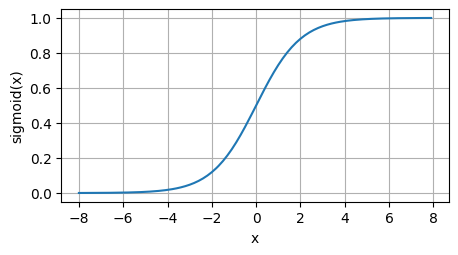

In [15]:
y = torch.sigmoid(x)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), y.detach())
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.show()

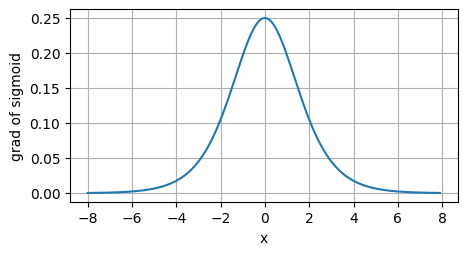

In [16]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)

plt.figure(figsize=(5,2.5))
plt.plot(x.detach(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of sigmoid')
plt.grid()
plt.show()

## The actual neural network

I'll work out different models trying to improve different details and see how does the
performance of the model improve. The starting model has an error of about 5%, the goal
is to take it down to under 1.5%

So I'll go step by step with the first example that the teachet gave us, understand it,
and start modifying details and running the tests to improve it.

In [17]:
# Import things
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Initialize neural network

The first step is to initialize the architecture of the neural network. 
There are a lot of different architectures that define different organization of 
layers and hidden units in each layer. We'll be using simple Fast-forward architectures
without exploring things like convolution networks.

The first example done uses a 2 layer linear layers that uses 300 hidden units each.

In [18]:
input_size = 784
hidden_sizes = 300
output_size = 10

MLP_2HH_model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes),
    nn.ReLU(),
    nn.Linear(hidden_sizes, output_size),
    nn.LogSoftmax(dim=1)
)
print(MLP_2HH_model)

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


In [19]:
optimizer = optim.SGD(MLP_2HH_model.parameters(), lr=0.001)
criterion = nn.NLLLoss() # Loss Function
entropyepochs = 1
batch_size = 8

In [20]:
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = MLP_2HH_model(images)    # log probabilities
loss = criterion(logps, labels)  # calculate the NLL loss

In [21]:
print('Before backward pass: \n', MLP_2HH_model[0].weight.grad)
loss.backward()
print('After backward pass: \n', MLP_2HH_model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007]])


In [22]:
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:                   # Training pass on a mini batch

        images = images.view(images.shape[0], -1)         # Flatten MNIST images into a 784 long vector

        optimizer.zero_grad()                             #
        output = MLP_2HH_model(images)                    # Forward
        loss = criterion(output, labels)                  # Loss
        loss.backward()                                   # backpropagation (gradient computation)
        optimizer.step()                                  # weights (NN parameters) update

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 1.540955843066356
Epoch 1 - Training loss: 0.7662007547835551
Epoch 2 - Training loss: 0.555295502548533
Epoch 3 - Training loss: 0.4692424304926319
Epoch 4 - Training loss: 0.4218764626649397
Epoch 5 - Training loss: 0.391310150101622
Epoch 6 - Training loss: 0.36964703108201913
Epoch 7 - Training loss: 0.3530919378055438
Epoch 8 - Training loss: 0.33960467300562464
Epoch 9 - Training loss: 0.32822427940743565
Epoch 10 - Training loss: 0.31855784078587346
Epoch 11 - Training loss: 0.309885441375249
Epoch 12 - Training loss: 0.3021255509812695
Epoch 13 - Training loss: 0.29508725785688045
Epoch 14 - Training loss: 0.28863912284660187

Training Time (in minutes) = 2.7309989015261333


Correct Digit = 3
Predicted Digit = 3
Network output = [0.001 0.    0.001 0.993 0.    0.004 0.    0.    0.001 0.   ]


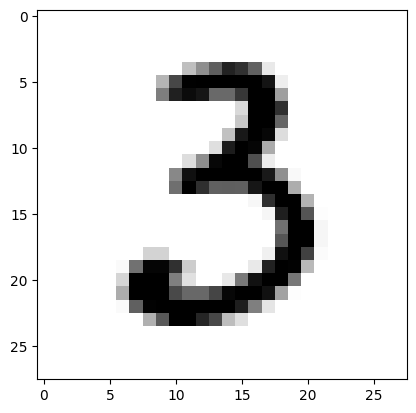

In [23]:
images, labels = next(iter(test_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = MLP_2HH_model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Correct Digit =", labels.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
print("Network output =", np.around(probab,3))

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

# view_classify(img.view(1, 28, 28), ps)

In [24]:
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = MLP_2HH_model(img)


    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("Test Error Rate (%) 	 =", np.round(100*(1 - correct_count/all_count),2))

Number Of Images Tested = 10000
Test Error Rate (%) 	 = 7.64


In order to run tests easier, I'll write a function that runs all the processing that we
just did for testing and receives the network, optimizer and loss function criterion as
a paramter. I'll then run the same test to be sure that it works fine.

In [29]:
def test_minst_neural_network(model, optimizer, criterion, epochs=15):

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ])

    train_set = datasets.MNIST('datasets/', download=True, train=True, transform=transform)
    test_set = datasets.MNIST('datasets/', download=True, train=False, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

    images, labels = next(iter(train_loader))
    images = images.view(images.shape[0], -1)

    time0 = time()
    for e in range(epochs):
        running_loss = 0
        for images, labels in train_loader:                   # Training pass on a mini batch

            images = images.view(images.shape[0], -1)         # Flatten MNIST images into a 784 long vector

            optimizer.zero_grad()                             #
            output = model(images)                    # Forward
            loss = criterion(output, labels)                  # Loss
            loss.backward()                                   # backpropagation (gradient computation)
            optimizer.step()                                  # weights (NN parameters) update

            running_loss += loss.item()
        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))

    print("\nTraining Time (in minutes) =",(time()-time0)/60)

    images, labels = next(iter(test_loader))

    correct_count, all_count = 0, 0
    for images,labels in test_loader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)


            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1

    print("Number Of Images Tested =", all_count)
    print("Test Error Rate (%) 	 =", np.round(100*(1 - correct_count/all_count),2))
        

In [30]:
input_size = 784
hidden_sizes = 300
output_size = 10

MLP_2HH_model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes),
    nn.ReLU(),
    nn.Linear(hidden_sizes, output_size),
    nn.LogSoftmax(dim=1)
)
optimizer = optim.SGD(MLP_2HH_model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

test_minst_neural_network(MLP_2HH_model, optimizer, criterion)

Epoch 0 - Training loss: 1.5624365295682634
Epoch 1 - Training loss: 0.7747617527874294
Epoch 2 - Training loss: 0.562045901918462
Epoch 3 - Training loss: 0.47442057997242476
Epoch 4 - Training loss: 0.42596214858771386
Epoch 5 - Training loss: 0.3947639650881672
Epoch 6 - Training loss: 0.3722929705752493
Epoch 7 - Training loss: 0.3550337495516612
Epoch 8 - Training loss: 0.3411357831090752
Epoch 9 - Training loss: 0.32968371396443485
Epoch 10 - Training loss: 0.31953734979192333
Epoch 11 - Training loss: 0.310696863805625
Epoch 12 - Training loss: 0.3028299902150753
Epoch 13 - Training loss: 0.29575715299004685
Epoch 14 - Training loss: 0.2893044004228705

Training Time (in minutes) = 2.5775928695996604
Number Of Images Tested = 10000
Test Error Rate (%) 	 = 7.78


In [31]:
input_size = 784
hidden_sizes = 300
output_size = 10

MLP_2HH_model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes),
    nn.ReLU(),
    nn.Linear(hidden_sizes, output_size),
    nn.LogSoftmax(dim=1)
)
optimizer = optim.Adam(
    MLP_2HH_model.parameters(), 
    lr=0.001,
    betas=(0.9, 0.999),
    eps=1e-08,
    amsgrad=True
)
criterion = nn.NLLLoss()

test_minst_neural_network(MLP_2HH_model, optimizer, criterion)

Epoch 0 - Training loss: 0.22144955799464128
Epoch 1 - Training loss: 0.09147647775507081
Epoch 2 - Training loss: 0.06110316781061036
Epoch 3 - Training loss: 0.04226996837670841
Epoch 4 - Training loss: 0.029405357085849973
Epoch 5 - Training loss: 0.02041686589400575
Epoch 6 - Training loss: 0.013601095547464536
Epoch 7 - Training loss: 0.009093726885139267
Epoch 8 - Training loss: 0.005457522670442024
Epoch 9 - Training loss: 0.0030182734401240675
Epoch 10 - Training loss: 0.002082058113036818
Epoch 11 - Training loss: 0.0015096789792258313
Epoch 12 - Training loss: 0.0011274861482621196
Epoch 13 - Training loss: 0.0009305320433778921
Epoch 14 - Training loss: 0.0007959325329056907

Training Time (in minutes) = 2.823324990272522
Number Of Images Tested = 10000
Test Error Rate (%) 	 = 1.62
